# news classification using Naive Bayes

Fateme ZareKarizi
810198550

# Introduction

In this assignment we're given a train set of datas and with using naive bayes we should train our model so we can then classify a given content into one of these six titles:

health / political / sport / technology / events / cultural

In [1]:
from hazm import Normalizer, word_tokenize, Lemmatizer, Stemmer, stopwords_list
from sklearn.model_selection import train_test_split
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from collections import defaultdict
import math
import numpy as np
import pandas as pd
import os

In [2]:
HEALTH = 'سلامت'
POLITICAL = 'سیاسی'
SPORT = 'ورزشی'
TECHNOLOGY = 'فناوری'
EVENTS = 'حوادث'
CULTURAL = 'فرهنگی/هنری'

HEALTH_INDEX = 0
POLITICAL_INDEX = 1 
SPORT_INDEX = 2
TECHNOLOGY_INDEX = 3
EVENTS_INDEX = 4
CULTURAL_INDEX = 5

persian_stop_words = {'،', 'به', 'که', 'در', 'و', 'این', '.', 'از', 'ما', 'با', 'تا', 'یا', 'آن', 'را', ':', 'داشت', 'است', 'برای', 'دار', 'شد', 'کرد', 'کن', 'یک', ')', '(', '«' , '»' ,':', '!', '?', '؛', '؟', 'آن‌ها', 'ها'}

TRAIN_SET_PATH = 'train.csv'
DATA_SET_PATH = 'test.csv'

# Pre Processing and Cleaning the Data

extract csv files and Split train data into test and train set

In [3]:
train_set = pd.read_csv(TRAIN_SET_PATH)
test_set = pd.read_csv(DATA_SET_PATH)
train_set.info()
train_set.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    9000 non-null   object
 1   content  9000 non-null   object
dtypes: object(2)
memory usage: 140.8+ KB


normalize, tokenize our content and remove stop words so we can have a clean train set for our classification.

In [4]:
class Pre_Processor:
    def __init__(self, X):
        self.X_copy = X.copy()
        
    def normalize(self):
        self.normalizer = Normalizer()
        self.X_copy['content'] = self.X_copy['content'].apply(self.normalizer.normalize)
    
    def tokenize(self):
        self.X_copy['content'] = self.X_copy['content'].apply(word_tokenize)
    
    def remove_stop_words(self):
        self.stop_words = stopwords_list()
        self.X_copy['content'] = self.X_copy.apply(lambda x: [word for word in x['content'] if word not in self.stop_words and word not in persian_stop_words and not word.isdigit()], axis=1)
    
    def lemmatizing(self, l):
        return [self.lemmatizer.lemmatize(i) for i in l]
        
    def lemmatize(self):
        self.lemmatizer = Lemmatizer()
        self.X_copy['content'] = self.X_copy['content'].apply(self.lemmatizing)
    
    def stemmering(self, l):
        return [self.stemmer.stem(i) for i in l]
    
    def stemmerize(self):
        self.stemmer = Stemmer()
        self.X_copy['content'] = self.X_copy['content'].apply(self.stemmering)
    
    def apply_pre_process(self):
        self.normalize()
        self.tokenize()
        self.remove_stop_words()
        
    def get_pre_processed_text(self):
        return self.X_copy

In [5]:
pre_processor = Pre_Processor(train_set)
pre_processor.apply_pre_process()
text = pre_processor.get_pre_processed_text()
text.head()

,label,content
0,فناوری,"[گزارش‌های, منتشر, حاکی, کاربران, تلگرام, مناط..."
1,ورزشی,"[سوپر, استار, سینما, قهرمانان, سابق, ووشو, کون..."
2,حوادث,"[مدیرعامل, شرکت, عمران, آب, کیش, فوت, نفر, آتش..."
3,فناوری,"[نوجوان, انگلیسی, اتهام, هک, حساب‌های, کاربری,..."
4,سلامت,"[دانشمندان, جدیدترین, مطالعات, اثرات, ویروس, ک..."


In [6]:
class frequency_matrix:
    def __init__(self):
        self.word_set = defaultdict(int)
        
    def count_vectorization(self, X):
        X_copy = X.copy()
        for index, text in X_copy.content.iteritems():
            for word in text:
                if word not in persian_stop_words:
                    if word in self.word_set:
                        count_word = self.word_set[word]
                        count_word += 1
                        self.word_set[word] = count_word
                    else:
                        self.word_set[word] = 1
            
    def print_sorted_matrix(self):
        for word in sorted(self.word_set, key=self.word_set.get, reverse=True):
            print(word, self.word_set[word])
        print()
        print()
        
    def get_dic(self):
        return self.word_set

In [7]:
health_df = text[text['label'] == HEALTH]
political_df = text[text['label'] == POLITICAL]
sport_df = text[text['label'] == SPORT]
technology_df = text[text['label'] == TECHNOLOGY]
events_df = text[text['label'] == EVENTS]
cultural_df = text[text['label'] == CULTURAL]

In [8]:
class create_plot:
    def __init__(self, df, category):
        self.df = df
        self.category = category
        self.freq_mat = frequency_matrix()
        self.freq_mat.count_vectorization(self.df)
        self.first_five = Counter(self.freq_mat.get_dic()).most_common(5)
    
    def show_plot(self):
        label = list(zip(*self.first_five))[0]
        word = list(zip(*self.first_five))[1]
        x_pos = np.arange(len(label)) 

        plt.bar(x_pos, word,align='center')
        plt.xticks(x_pos, label) 
        plt.ylabel('Most Common Words')
        plt.xlabel(self.category)
        plt.show()

# 6

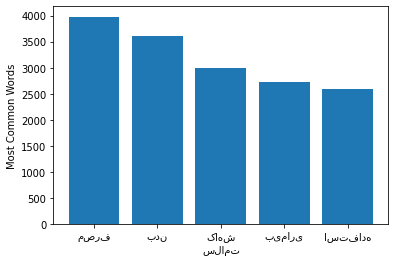

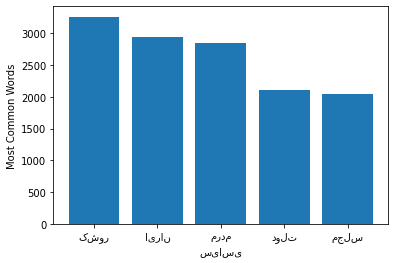

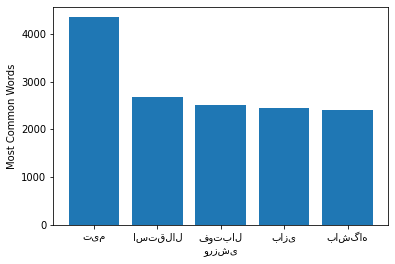

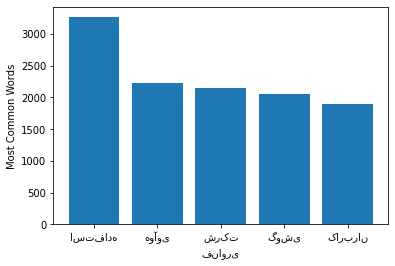

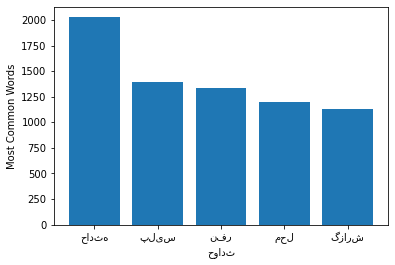

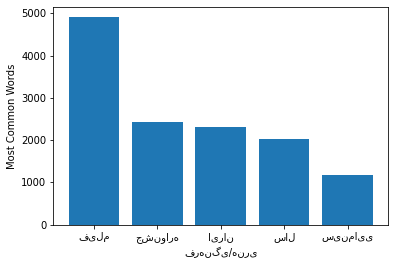

In [9]:
create_plot(health_df, HEALTH).show_plot()
create_plot(political_df, POLITICAL).show_plot()
create_plot(sport_df, SPORT).show_plot()
create_plot(technology_df, TECHNOLOGY).show_plot()
create_plot(events_df, EVENTS).show_plot()
create_plot(cultural_df, CULTURAL).show_plot()

In [17]:
class Classifier:
    def __init__(self, train_df, test_df):
        self.train_df = train_df
        self.test_df = test_df
        
        self.train_word_count = self.calculate_word_count(self.train_df)
        self.test_word_count = self.calculate_word_count(self.test_df)
        
        self.health_word_frequency = defaultdict(int)
        self.political_word_frequency = defaultdict(int)
        self.sport_word_frequency = defaultdict(int)
        self.technology_word_frequency = defaultdict(int)
        self.events_word_frequency = defaultdict(int)
        self.cultural_word_frequency = defaultdict(int)
        
        self.likelihood_prob_health = defaultdict(int)
        self.likelihood_prob_political = defaultdict(int)
        self.likelihood_prob_sport = defaultdict(int)
        self.likelihood_prob_technology = defaultdict(int)
        self.likelihood_prob_events = defaultdict(int)
        self.likelihood_prob_cultural = defaultdict(int)
        
        self.prior_prob_health = None
        self.prior_prob_political = None
        self.prior_prob_sport = None
        self.prior_prob_technology = None
        self.prior_prob_events = None
        self.prior_prob_cultural = None
        
    def calculate_word_count(self, df):
        health_count = len(df[df['label'] == HEALTH])
        political_count = len(df[df['label'] == POLITICAL])
        sport_count = len(df[df['label'] == SPORT])
        technology_count = len([df['label'] == TECHNOLOGY])
        events_count = len(df[df['label'] == SPORT])
        cultural_count = len(df[df['label'] == CULTURAL])
        
        return health_count + political_count + sport_count + technology_count + events_count + cultural_count 
    
    def calculate_prior_prob(self, df, label, word_count):
        return len(df[df['label'] == label]) / word_count
    
    def calculate_likelihood_prob(self, additive_smoothing):
        alpha = 0.0001

        if additive_smoothing:
            alpha = 1
        self.health_words_count = sum(self.health_word_frequency.values())
        for word, freq in self.health_word_frequency.items():
            self.likelihood_prob_health[word] = (freq + alpha) / (self.health_words_count + self.health_words_count * alpha)
            
        self.political_words_count = sum(self.political_word_frequency.values())
        for word, freq in self.political_word_frequency.items():
            self.likelihood_prob_political[word] = (freq + alpha) / (self.political_words_count + self.political_words_count * alpha)
        
        self.sport_words_count = sum(self.sport_word_frequency.values())
        for word, freq in self.sport_word_frequency.items():
            self.likelihood_prob_sport[word] = (freq + alpha) / (self.sport_words_count + self.sport_words_count * alpha)
        
        self.technology_words_count = sum(self.technology_word_frequency.values())
        for word, freq in self.technology_word_frequency.items():
            self.likelihood_prob_technology[word] = (freq + alpha) / (self.technology_words_count + self.technology_words_count * alpha)
            
        self.events_words_count = sum(self.events_word_frequency.values())
        for word, freq in self.events_word_frequency.items():
            self.likelihood_prob_events[word] = (freq + alpha) / (self.events_words_count + self.events_words_count * alpha)
            
        self.cultural_words_count = sum(self.cultural_word_frequency.values())
        for word, freq in self.cultural_word_frequency.items():
            self.likelihood_prob_cultural[word] = (freq + alpha) / (self.cultural_words_count + self.cultural_words_count * alpha)
    
    def calculate_words_frequency(self, df, label):
        for words in df[df['label'] == label]['content']:
            for word in words:
                if label == HEALTH:
                    if (word not in self.health_word_frequency):
                        self.health_word_frequency[word] = 0
                    else:
                        self.health_word_frequency[word] += 1
            
                elif label == POLITICAL:
                    if (word not in self.political_word_frequency):
                        self.political_word_frequency[word] = 0
                    else:
                        self.political_word_frequency[word] += 1
            
                elif label == SPORT:
                    if (word not in self.sport_word_frequency):
                        self.sport_word_frequency[word] = 0
                    else:
                        self.sport_word_frequency[word] += 1
            
                elif label == TECHNOLOGY:
                    if (word not in self.technology_word_frequency):
                        self.technology_word_frequency[word] = 0
                    else:
                        self.technology_word_frequency[word] += 1
                        
                elif label == EVENTS:
                    if (word not in self.events_word_frequency):
                        self.events_word_frequency[word] = 0
                    else:
                        self.events_word_frequency[word] += 1
                        
                elif label == CULTURAL:
                    if (word not in self.cultural_word_frequency):
                        self.cultural_word_frequency[word] = 0
                    else:
                        self.cultural_word_frequency[word] += 1
                
                if (word not in self.health_word_frequency):
                    self.health_word_frequency[word] = 0
                        
                if (word not in self.political_word_frequency):
                    self.political_word_frequency[word] = 0
                    
                if (word not in self.sport_word_frequency):
                    self.sport_word_frequency[word] = 0
                    
                if (word not in self.technology_word_frequency):
                    self.technology_word_frequency[word] = 0
                
                if (word not in self.events_word_frequency):
                    self.events_word_frequency[word] = 0
                    
                if (word not in self.cultural_word_frequency):
                    self.cultural_word_frequency[word] = 0

    
    def train(self, additive_smoothing):
        self.calculate_words_frequency(self.train_df, HEALTH)
        self.calculate_words_frequency(self.train_df, POLITICAL)
        self.calculate_words_frequency(self.train_df, SPORT)
        self.calculate_words_frequency(self.train_df, TECHNOLOGY)
        self.calculate_words_frequency(self.train_df, EVENTS)
        self.calculate_words_frequency(self.train_df, CULTURAL)
        
        self.prior_prob_health = self.calculate_prior_prob(self.train_df, HEALTH, self.train_word_count)
        self.prior_prob_political = self.calculate_prior_prob(self.train_df, POLITICAL, self.train_word_count)
        self.prior_prob_sport = self.calculate_prior_prob(self.train_df, SPORT, self.train_word_count)
        self.prior_prob_technology = self.calculate_prior_prob(self.train_df, TECHNOLOGY, self.train_word_count)
        self.prior_prob_events = self.calculate_prior_prob(self.train_df, EVENTS, self.train_word_count)
        self.prior_prob_cultural = self.calculate_prior_prob(self.train_df, CULTURAL, self.train_word_count)
        
        self.calculate_likelihood_prob(additive_smoothing)

        
        
    
    def run(self):
        self.test_df["prediction"] = self.test_df.apply(lambda row: self.predict(row['content']), axis=1)
        return self.test_df
    
    def predict(self, words):
        sum_health = math.log(self.prior_prob_health)
        sum_political = math.log(self.prior_prob_political)
        sum_sport = math.log(self.prior_prob_sport)
        sum_technology = math.log(self.prior_prob_technology)
        sum_events = math.log(self.prior_prob_events)
        sum_cultural = math.log(self.prior_prob_cultural)

        for word in words:
            if word not in self.likelihood_prob_health and word not in self.likelihood_prob_political and word not in self.likelihood_prob_sport and word not in self.likelihood_prob_technology and word not in self.likelihood_prob_events and word not in self.likelihood_prob_cultural:
                continue
            
            if word not in self.likelihood_prob_health:
                rec_score = float('-inf')
                break

            if word not in self.likelihood_prob_political:
                not_rec_score = float('-inf')
                break
                
            if word not in self.likelihood_prob_sport:
                rec_score = float('-inf')
                break

            if word not in self.likelihood_prob_technology:
                not_rec_score = float('-inf')
                break
                
            if word not in self.likelihood_prob_events:
                rec_score = float('-inf')
                break
            
            if word not in self.likelihood_prob_cultural:
                rec_score = float('-inf')
                break
            
            sum_health += math.log(self.likelihood_prob_health[word] / self.health_words_count)
            sum_political += math.log(self.likelihood_prob_political[word] / self.political_words_count)
            sum_sport += math.log(self.likelihood_prob_sport[word] / self.sport_words_count)
            sum_technology += math.log(self.likelihood_prob_technology[word] / self.technology_words_count)
            sum_events += math.log(self.likelihood_prob_events[word] / self.events_words_count)
            sum_cultural += math.log(self.likelihood_prob_cultural[word] / self.cultural_words_count)
                
                    
        categories = [sum_health, sum_political, sum_sport, sum_technology, sum_events, sum_cultural]
        labels = [HEALTH, POLITICAL, SPORT, TECHNOLOGY, EVENTS, CULTURAL]
        
        return labels[np.argmax(categories)]

In [18]:
test_pre_processor = Pre_Processor(test_set)
test_pre_processor.apply_pre_process()
test_text = test_pre_processor.get_pre_processed_text()
classifier = Classifier(text, test_text)
classifier.train(additive_smoothing=True)

In [19]:
without = Classifier(text, test_text)
without.train(additive_smoothing=False)
predicted__df = without.run()

In [13]:
predicted_df = classifier.run()
predicted_df.head(20)

,label,content,prediction
0,فناوری,"[اعلام, لیست, شرکت, مجاز, ثبت, سفارش, ارائه, خ...",فناوری
1,فرهنگی/هنری,"[استاد, علم, قرائت, قرآن, کریم, ریشه, موسیقی, ...",فرهنگی/هنری
2,حوادث,"[آتش, سوزی‌های, زنجیره‌ای, جنگل‌های, زاگرس, اس...",حوادث
3,فناوری,"[استفاده, سرویس‌های, iMassage, Facetime, محصول...",فناوری
4,حوادث,"[دادستان, عمومی, انقلاب, یاسوج, میلیون, دلار, ...",حوادث
5,حوادث,"[مردی, یک‌, اتهام, قتل, تبرئه, مهاجرت, تهران, ...",حوادث
6,فناوری,"[شرایط, کنونی, بازار, گوشی, هوشمند, گونه‌ای, ر...",فناوری
7,ورزشی,"[شایسته, وضعیتی, استاندار, مازندران, مدیرکل, و...",ورزشی
8,فناوری,"[کاربران, دنبال, گوشی, میان‌رده‌, خوش‌قیمتی, ب...",فناوری
9,فرهنگی/هنری,"[نشریه, ورایتی, گزارشی, پیش‌بینی, جشنواره, احت...",فرهنگی/هنری


In [20]:
class Evaluation:
    def __init__(self, predicted_df):
        self.predicted_df = predicted_df
        
        self.accuracy = None
        self.macro = None
        self.f1_weighted = None
        
        self.health_precision = None
        self.political_precision = None
        self.sport_precision = None
        self.technology_precision = None
        self.events_precision = None
        self.cultural_precision = None
        
        self.health_recall = None
        self.political_recall = None
        self.sport_recall = None
        self.technology_recall = None
        self.events_recall = None
        self.cultural_recall = None
        
        self.health_f1_score = None
        self.political_f1_score = None
        self.sport_f1_score = None
        self.technology_f1_score = None
        self.events_f1_score = None
        self.cultural_f1_score = None
    
    def calculate_accuracy(self):
        similarity = self.predicted_df["label"] == self.predicted_df["prediction"]
        row_occurrences = np.count_nonzero(similarity == True, axis=0)
        self.accuracy = row_occurrences / self.predicted_df.shape[0]
    
    def calculate_precision(self):
        correct_health_count = len(self.predicted_df[(self.predicted_df['label'] == HEALTH) & (self.predicted_df['prediction'] == HEALTH)])
        all_detected_health_count = len(self.predicted_df[self.predicted_df["prediction"] == HEALTH])
        self.health_precision =  correct_health_count/all_detected_health_count
        
        correct_political_count = len(self.predicted_df[(self.predicted_df['label'] == POLITICAL) & (self.predicted_df['prediction'] == POLITICAL)])
        all_detected_political_count = len(self.predicted_df[self.predicted_df["prediction"] == POLITICAL])
        self.political_precision =  correct_political_count/all_detected_political_count
        
        correct_sport_count = len(self.predicted_df[(self.predicted_df['label'] == SPORT) & (self.predicted_df['prediction'] == SPORT)])
        all_detected_sport_count = len(self.predicted_df[self.predicted_df["prediction"] == SPORT])
        self.sport_precision =  correct_sport_count/all_detected_sport_count
        
        correct_technology_count = len(self.predicted_df[(self.predicted_df['label'] == TECHNOLOGY) & (self.predicted_df['prediction'] == TECHNOLOGY)])
        all_detected_technology_count = len(self.predicted_df[self.predicted_df["prediction"] == TECHNOLOGY])
        self.technology_precision =  correct_technology_count/all_detected_technology_count
        
        correct_events_count = len(self.predicted_df[(self.predicted_df['label'] == EVENTS) & (self.predicted_df['prediction'] == EVENTS)])
        all_detected_events_count = len(self.predicted_df[self.predicted_df["prediction"] == EVENTS])
        self.events_precision =  correct_events_count/all_detected_events_count
        
        correct_cultural_count = len(self.predicted_df[(self.predicted_df['label'] == CULTURAL) & (self.predicted_df['prediction'] == CULTURAL)])
        all_detected_cultural_count = len(self.predicted_df[self.predicted_df["prediction"] == CULTURAL])
        self.cultural_precision =  correct_cultural_count/all_detected_cultural_count
    
    
    def calculate_recall(self):
        correct_health_count = len(self.predicted_df[(self.predicted_df['label'] == HEALTH) & (self.predicted_df['prediction'] == HEALTH)])
        total_health = len(self.predicted_df[self.predicted_df["label"] == HEALTH])
        self.health_recall =  correct_health_count/total_health
        
        correct_political_count = len(self.predicted_df[(self.predicted_df['label'] == POLITICAL) & (self.predicted_df['prediction'] == POLITICAL)])
        total_political = len(self.predicted_df[self.predicted_df["label"] == POLITICAL])
        self.political_recall =  correct_political_count/total_political
        
        correct_sport_count = len(self.predicted_df[(self.predicted_df['label'] == SPORT) & (self.predicted_df['prediction'] == SPORT)])
        total_sport = len(self.predicted_df[self.predicted_df["label"] == SPORT])
        self.sport_recall =  correct_sport_count/total_sport
        
        correct_technology_count = len(self.predicted_df[(self.predicted_df['label'] == TECHNOLOGY) & (self.predicted_df['prediction'] == TECHNOLOGY)])
        total_technology = len(self.predicted_df[self.predicted_df["label"] == TECHNOLOGY])
        self.technology_recall =  correct_technology_count/total_technology
        
        correct_events_count = len(self.predicted_df[(self.predicted_df['label'] == EVENTS) & (self.predicted_df['prediction'] == EVENTS)])
        total_events = len(self.predicted_df[self.predicted_df["label"] == EVENTS])
        self.events_recall =  correct_events_count/total_events
        
        correct_cultural_count = len(self.predicted_df[(self.predicted_df['label'] == CULTURAL) & (self.predicted_df['prediction'] == CULTURAL)])
        total_cultural = len(self.predicted_df[self.predicted_df["label"] == CULTURAL])
        self.cultural_recall =  correct_cultural_count/total_cultural
    
    def f1_score(self, precision, recall):
        return (2* ((precision*recall)/(precision+recall)))
    
    def calculate_f1_score(self):
        self.health_f1_score = self.f1_score(self.health_precision, self.health_recall)
        self.political_f1_score = self.f1_score(self.political_precision, self.political_recall)
        self.sport_f1_score = self.f1_score(self.sport_precision, self.sport_recall)
        self.technology_f1_score = self.f1_score(self.technology_precision, self.technology_recall)
        self.events_f1_score = self.f1_score(self.events_precision, self.events_recall)
        self.cultural_f1_score = self.f1_score(self.cultural_precision, self.cultural_recall)
    
    def calculate_f1_macro(self):
        f1_scores = [self.health_f1_score, self.political_f1_score, self.sport_f1_score, self.technology_f1_score, self.events_f1_score, self.cultural_f1_score]
        self.macro = np.mean(f1_scores)
    
    def calcualte_f1_weighted(self):
        score = 0
        
        score += self.health_f1_score * (self.predicted_df['label'] == HEALTH).sum()
        score += self.political_f1_score * (self.predicted_df['label'] == POLITICAL).sum()
        score += self.sport_f1_score * (self.predicted_df['label'] == SPORT).sum()
        score += self.technology_f1_score * (self.predicted_df['label'] == TECHNOLOGY).sum()
        score += self.events_f1_score * (self.predicted_df['label'] == EVENTS).sum()
        score += self.cultural_f1_score * (self.predicted_df['label'] == CULTURAL).sum()
        
        self.f1_weighted = score/self.predicted_df['label'].count()
    
    def evaluate(self):
        self.calculate_accuracy()
        self.calculate_precision()
        self.calculate_recall()
        self.calculate_f1_score()
        self.calculate_f1_macro()
        self.calcualte_f1_weighted()

    
    def print_evaluation(self):
        print("ACCURACY: " + "{:.2f}".format((self.accuracy) * 100))
        print("MACRO: " + "{:.2f}".format((self.macro) * 100))
        print("WEIGHTED: " + "{:.2f}".format((self.f1_weighted) * 100))
        print()
        print("HEALTH")
        print("**************************************")
        print("PRECISION: " + "{:.2f}".format(self.health_precision * 100))
        print("RECALL: " + "{:.2f}".format(self.health_recall * 100))
        print("F1: " + "{:.2f}".format(self.health_f1_score * 100))
        
        print()
        print("POLITICAL")
        print("**************************************")
        print("PRECISION: " + "{:.2f}".format(self.political_precision * 100))
        print("RECALL: " + "{:.2f}".format(self.political_recall * 100))
        print("F1: " + "{:.2f}".format(self.political_f1_score * 100))
        
        print()
        print("SPORT")
        print("**************************************")
        print("PRECISION: " + "{:.2f}".format(self.sport_precision * 100))
        print("RECALL: " + "{:.2f}".format(self.sport_recall * 100))
        print("F1: " + "{:.2f}".format(self.sport_f1_score * 100))
        
        print()
        print("TECHNOLOGY")
        print("**************************************")
        print("PRECISION: " + "{:.2f}".format(self.technology_precision * 100))
        print("RECALL: " + "{:.2f}".format(self.technology_recall * 100))
        print("F1: " + "{:.2f}".format(self.technology_f1_score * 100))
        
        print()
        print("EVENTS")
        print("**************************************")
        print("PRECISION: " + "{:.2f}".format(self.events_precision * 100))
        print("RECALL: " + "{:.2f}".format(self.events_recall * 100))
        print("F1: " + "{:.2f}".format(self.events_f1_score * 100))
        
        print()
        print("CULTURAL")
        print("**************************************")
        print("PRECISION: " + "{:.2f}".format(self.cultural_precision * 100))
        print("RECALL: " + "{:.2f}".format(self.cultural_recall * 100))
        print("F1: " + "{:.2f}".format(self.cultural_f1_score * 100))
       
        
    

# EVALUATION

without smoothing

In [21]:
evaluation = Evaluation(predicted_df)
evaluation.evaluate()
evaluation.print_evaluation()


ACCURACY: 89.51
MACRO: 89.90
WEIGHTED: 89.72

HEALTH
**************************************
PRECISION: 98.71
RECALL: 86.44
F1: 92.17

POLITICAL
**************************************
PRECISION: 94.25
RECALL: 82.00
F1: 87.70

SPORT
**************************************
PRECISION: 91.09
RECALL: 96.84
F1: 93.88

TECHNOLOGY
**************************************
PRECISION: 97.45
RECALL: 91.07
F1: 94.15

EVENTS
**************************************
PRECISION: 71.48
RECALL: 99.00
F1: 83.02

CULTURAL
**************************************
PRECISION: 97.33
RECALL: 81.11
F1: 88.48


with smoothing

In [22]:
evaluation_ = Evaluation(predicted__df)
evaluation_.evaluate()
evaluation_.print_evaluation()

ACCURACY: 91.93
MACRO: 92.01
WEIGHTED: 91.96

HEALTH
**************************************
PRECISION: 98.75
RECALL: 89.27
F1: 93.77

POLITICAL
**************************************
PRECISION: 90.62
RECALL: 87.00
F1: 88.78

SPORT
**************************************
PRECISION: 96.32
RECALL: 96.32
F1: 96.32

TECHNOLOGY
**************************************
PRECISION: 95.09
RECALL: 92.26
F1: 93.66

EVENTS
**************************************
PRECISION: 86.88
RECALL: 96.00
F1: 91.21

CULTURAL
**************************************
PRECISION: 86.24
RECALL: 90.56
F1: 88.35


# questions

1-In our text we might see a word in different forms, but they are from same root and can have same effect in our classification. Stemming will remove prefix and postfix of a word to find it's root, but Lemmatization except removing postfix and prefix of word, it will verify that root to be correct in meaning.

***************************************************************************************

2-Evidence : By seeing evidence we want to calculate posterior probability.

Likelihood : Probability of having evidence in category c.

Prior : Probability of having category c in all rows of dataset.

Posterior : Probability of belonging word w to category c. We use this probability to classify.

****************************************************************************************
3-
من یک شیر درنده دیدم/من شیر آب را بستم
using bigram we can identify the meaning of that

****************************************************************************************
4-If word w in our test dataset was not appeared in category c, probability of belonging to that category would be zero. In other word, the likelihood will be zero. With Naive Bayes keep in mind we multiply words probability so probability of belonging text t to category c would be zero.


***************************************************************************************
5-In additive smoothing method if we see new word w in category c we assume small probability for this word belonging to category c using formula below:
        p=(xi+alpha)/(N+alpha*d)
By assuming alpha=0  we will get same result p=0 , but if we set alpha to some higher value, probability will not be zero.

****************************************************************************************
7-Precision : This parameter defines ratio of count of prediction of category c to actual count of actual data in
category c.

Recall : Ratio of correct prediction of system for category c.
For example if we predict all news are health we have hight recall value but our system not working correct.

On the other hand if our system is very definite that some news is in category health we have high precision. In this case we might miss predict many news or only predict health category and place other news in other categories.

**************************************************************************************
8- F1 uses harmonic mean wich is a kind of geometric mean and it's also dependent on FP and FN so it's good benchmark.

**********************************************************************************************
9-Macro : In macro-F1 we average from 6 values of 6 categories.

Micro : We consider all data together. micro-f1 = micro-precision = micro-recall = accuracy

Weighted : Depending on the number of parameters, we assign a weight to each value. Find the number of classes and
multiply by corresponding F1, then divide the sum of the obtained values by the total number.

*****************************************************************************************
11-we can see by applying smoothing we get better accuracy

*****************************************************************************************
12- same words in both categories can cause of this
for example I have this news:
وکیل مدافع متهم ایرانی
it is from political category but my classifier put this in evedents category.